In [1]:
import numpy as np
import pandas as pd
import os
os.chdir("D:\Teaching\inputs")

In [2]:
# read the file with high correlation
pca1 = pd.read_csv("PCA1.csv")
print(pca1.columns)

Index(['x1', 'x2'], dtype='object')


In [3]:
np.corrcoef(pca1.x1,pca1.x2)

array([[1.        , 0.99771306],
       [0.99771306, 1.        ]])

In [4]:
var1 = np.var(pca1.x1,ddof=1)
print(var1)
var2 = np.var(pca1.x2,ddof=1)
print(var2)
totalvar = var1 + var2
print(totalvar)

229.16666666666666
235.83333333333334
465.0


In [5]:
from sklearn.decomposition import PCA
# create PCA object
modelPCA = PCA(n_components = 2)
# apply PCA model on iris
x_pca1 = modelPCA.fit_transform(pca1)
print(type(x_pca1))

<class 'numpy.ndarray'>


In [6]:
print(modelPCA.explained_variance_)
print(modelPCA.explained_variance_ratio_)

[464.4683953   0.5316047]
[0.99885676 0.00114324]


In [7]:
# weights to convert original data into principal components
modelPCA.components_

array([[-0.70200792, -0.71216914],
       [ 0.71216914, -0.70200792]])

In [8]:
modelPCA.singular_values_

array([64.65458652,  2.1873368 ])

In [9]:
# transformed data
x_pca1_df = pd.DataFrame(x_pca1)
x_pca1_df.columns = ["PCA1","PCA2"]
print(x_pca1_df)

        PCA1      PCA2
0  32.531153  0.473380
1  24.035929 -0.879829
2  18.389382  0.574993
3   9.894159 -0.778217
4   4.247612  0.676605
5  -4.247612 -0.676605
6  -9.894159  0.778217
7 -18.389382 -0.574993
8 -24.035929  0.879829
9 -32.531153 -0.473380


In [10]:
# check the correlation among PCAs
np.corrcoef(x_pca1_df.PCA1,x_pca1_df.PCA2)

array([[ 1.00000000e+00, -1.25607397e-17],
       [-1.25607397e-17,  1.00000000e+00]])

In [11]:
# read the file with less correlation
pca2 = pd.read_csv("PCA2.csv")
print(pca2.columns)

Index(['x2', 'x1'], dtype='object')


In [12]:
# check the correlation
np.corrcoef(pca2.x1,pca2.x2)

array([[1.        , 0.25663801],
       [0.25663801, 1.        ]])

In [13]:
var1 = np.var(pca2.x1,ddof=1)
print(var1)
var2 = np.var(pca2.x2,ddof=1)
print(var2)
totalvar = var1 + var2
print(totalvar)

48.1
9.166666666666666
57.266666666666666


In [14]:
# create PCA object
modelPCA = PCA(n_components = 2)
# apply PCA model on iris
x_pca2 = modelPCA.fit_transform(pca2)

In [15]:
print(modelPCA.explained_variance_)
print(modelPCA.explained_variance_ratio_)

[48.83212623  8.43454043]
[0.85271466 0.14728534]


In [16]:
# Apply it on IRIS
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
import numpy as np
import pandas as pd
var1 = np.var(iris.sepal_length)
var2 = np.var(iris.sepal_width)
var3 = np.var(iris.petal_length)
var4 = np.var(iris.petal_width)
totvar = var1 + var2 + var3 + var4
print(var1,var2,var3,var4,totvar)

0.6811222222222223 0.1887128888888889 3.0955026666666665 0.5771328888888888 4.5424706666666665


In [18]:
# check the correlation
print(np.corrcoef(iris.sepal_length,iris.sepal_width))
print(np.corrcoef(iris.sepal_length,iris.petal_length))
print(np.corrcoef(iris.sepal_length,iris.petal_width))
print(np.corrcoef(iris.petal_length,iris.petal_width))

[[ 1.         -0.11756978]
 [-0.11756978  1.        ]]
[[1.         0.87175378]
 [0.87175378 1.        ]]
[[1.         0.81794113]
 [0.81794113 1.        ]]
[[1.         0.96286543]
 [0.96286543 1.        ]]


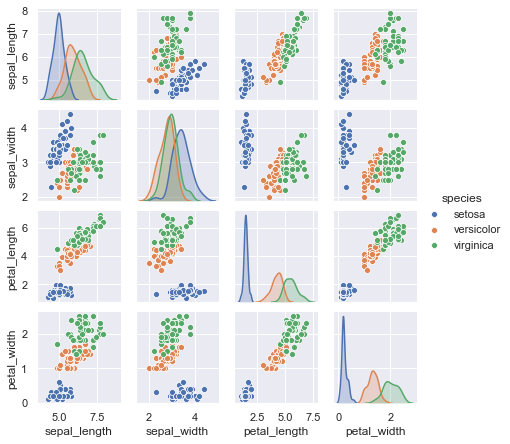

In [20]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue = 'species', height = 1.5)

In [21]:
# split the train data into independent variables (X) and dependent variable (Y)
x_iris = iris.drop('species', axis = 1)
print(x_iris.shape)
y_iris = iris['species']
print(y_iris.shape)
print(type(x_iris))
print(type(y_iris))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [30]:
# apply PCA
from sklearn.decomposition import PCA
# create PCA object
modelPCA = PCA(n_components = 0.95)
# apply PCA model on iris
X_PCA = modelPCA.fit_transform(x_iris)
print(type(X_PCA))
print(X_PCA.shape)

<class 'numpy.ndarray'>
(150, 2)


In [23]:
# print PCA weights
print(modelPCA.components_)                      # weights
print(modelPCA.explained_variance_)              # 
print(modelPCA.explained_variance_ratio_)
print(modelPCA.noise_variance_)
print(modelPCA.singular_values_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[4.22824171 0.24267075]
[0.92461872 0.05306648]
0.051022296508184385
[25.09996044  6.01314738]


In [24]:
print(X_PCA[0:10])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [31]:
# check the correlation between PCAs
print(np.corrcoef(X_PCA[:,0],X_PCA[:,1]))
# print(np.corrcoef(X_PCA[:,1],X_PCA[:,2]))
# print(np.corrcoef(X_PCA[:,2],X_PCA[:,3]))

[[ 1.0000000e+00 -5.8847136e-17]
 [-5.8847136e-17  1.0000000e+00]]


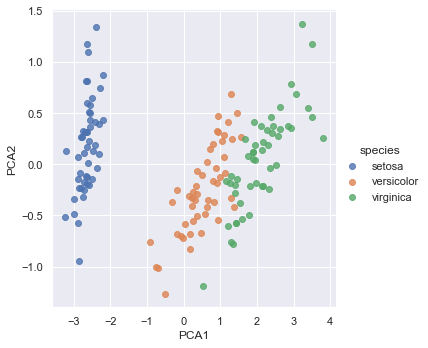

In [32]:
# inser the transformed data into original dataset and plot the graph
iris["PCA1"] = X_PCA[:,0]
iris["PCA2"] = X_PCA[:,1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data=iris, fit_reg = False)

In [36]:
# apply PCA to reduce the number of features such that 90% variance is captures
from sklearn.decomposition import PCA
# create PCA object
modelPCA = PCA(n_components = 0.98)
# apply PCA model on iris
X_2D = modelPCA.fit_transform(x_iris)
print(type(X_2D))
print(X_2D.shape)

<class 'numpy.ndarray'>
(150, 3)


In [34]:
# print PCA weights
print(modelPCA.components_)
print(modelPCA.explained_variance_)
print(modelPCA.explained_variance_ratio_)
print(modelPCA.noise_variance_)
print(modelPCA.singular_values_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
[4.22824171 0.24267075 0.0782095 ]
[0.92461872 0.05306648 0.01710261]
0.023835092973449417
[25.09996044  6.01314738  3.41368064]


In [35]:
print(X_2D)

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35575405 -0.03728186  0.12502108]
 [-2.50666891 -0.14601688